<a href="https://www.analytiksinc.com">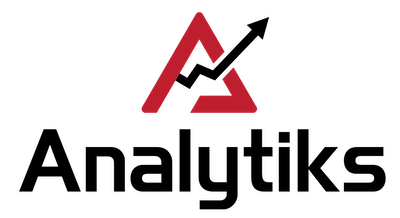</a>
<p style="text-align: right;"> © 2019. Analytiks Inc. </p>

# Predicting Survival on the Titanic (Classification)

<b>Dataset:</b> <i>Titanic_Clean.csv</i> <br>

<b>Description:</b><br>
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

<b>Features:</b>

- survival: Survival	0 = No, 1 = Yes
- pclass: Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex: Sex	0: ”male", 1: ”female"
- Age: Age Group	1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"
- sibsp: # of siblings / spouses aboard the Titanic	
- parch: # of parents / children aboard the Titanic	
- FareBand: Passenger fare	
- title: Title based on name	1: Mr, 2:Miss, 3: Mrs, 4:Master, 5:Royal, 6: Rare
- embarked: Port of Embarkation	 1 = Southampton, 2 = Cherbourg, 3 = Queenstown

<b>Objectives:</b>
- Load and Explore the Dataset
- Split into Training and Test Set (as per instructions)
- Build the following models using the Training Set:
    - KNN
    - Logistic Regression
    - Gaussian Naive Bayes
    - Decision Tree
- Print the Accuracy Score of each model using the Test Set

## Import Libraries

### Standard Libraries

In [1]:
#Data analysis libraries 
import numpy as np
import pandas as pd

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

#ignore warnings (Optional)
import warnings
warnings.filterwarnings('ignore')

### Additional Libraries

In [2]:
#Train Test Split
from sklearn.model_selection import train_test_split, cross_val_score

#Accuracy Score Metric
from sklearn import tree, metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#Required Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression ##MMS
from sklearn.naive_bayes import GaussianNB  #SS


#Others
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Load and Explore the Dataset

In [3]:
#Provide the path of the dataset
df = pd.read_csv("Titanic_Clean.csv")

### Inspect  Data

In [4]:
#Check the dataset
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
0,1,0,3,0,1,0,1,1,4,1
1,2,1,1,1,1,0,2,3,6,4
2,3,1,3,1,0,0,1,2,5,2
3,4,1,1,1,1,0,1,3,5,4
4,5,0,3,0,0,0,1,1,5,2


In [5]:
#Check the min, max, and mean values to determine if features are on the same scale
df.describe()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,0.523008,0.381594,1.361392,1.751964,4.636364,2.497194
std,257.353842,0.486592,0.836071,0.477990,1.102743,0.806057,0.635673,1.112838,1.353390,1.118156
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.500000
50%,446.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,2.000000
75%,668.500000,1.000000,3.000000,1.000000,1.000000,0.000000,2.000000,2.000000,6.000000,3.000000
max,891.000000,1.000000,3.000000,1.000000,8.000000,6.000000,3.000000,6.000000,7.000000,4.000000


In [6]:
#Identify and check the value counts of the target variable
#check for bias or heavily skewed class.
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
#Get the correlation of the attributes
corr = df.corr()
corr

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeGroup,FareBand
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,-0.057527,-0.001652,-0.030467,0.010871,0.040937,-0.022998
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.035322,0.081629,0.106811,0.373139,-0.106868,0.299357
Pclass,-0.035144,-0.338481,1.000000,-0.131900,0.083081,0.018443,0.045702,-0.184514,-0.283994,-0.634271
Sex,-0.042939,0.543351,-0.131900,1.000000,0.114631,0.245489,0.116569,0.453902,-0.116055,0.243613
SibSp,-0.057527,-0.035322,0.083081,0.114631,1.000000,0.414838,-0.059961,0.245915,-0.326398,0.393025
Parch,-0.001652,0.081629,0.018443,0.245489,0.414838,1.000000,-0.078665,0.284756,-0.259925,0.393881
Embarked,-0.030467,0.106811,0.045702,0.116569,-0.059961,-0.078665,1.000000,0.044263,-0.018166,-0.098161
Title,0.010871,0.373139,-0.184514,0.453902,0.245915,0.284756,0.044263,1.000000,-0.186032,0.323156
AgeGroup,0.040937,-0.106868,-0.283994,-0.116055,-0.326398,-0.259925,-0.018166,-0.186032,1.000000,-0.009585
FareBand,-0.022998,0.299357,-0.634271,0.243613,0.393025,0.393881,-0.098161,0.323156,-0.009585,1.000000


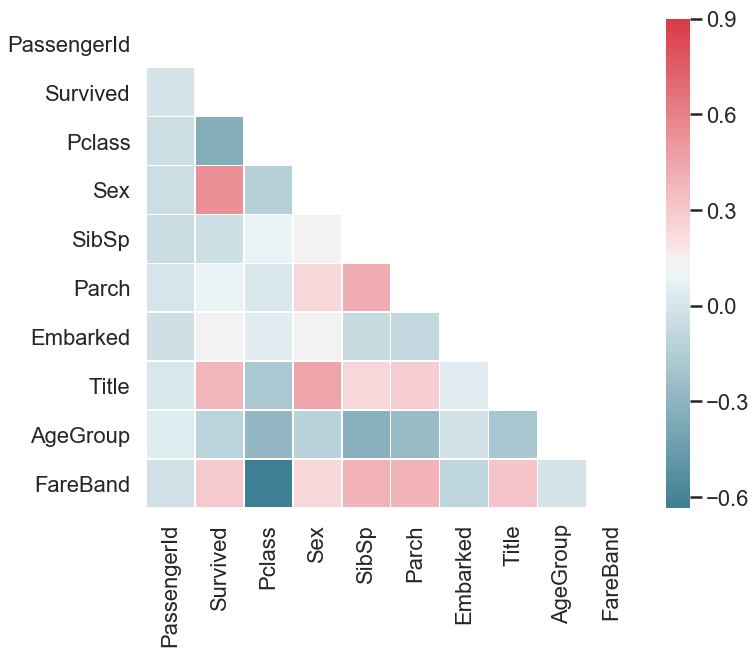

In [8]:
#Visualize Correlation

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

## Prepare Train and Test data

### Separate y (target) from x (predictor) columns
*Note: for the predictor columns, review the features to determine if any of the features should not be included in building the model*

In [9]:
#Split the features and the target column.
predictors = df.drop(["Survived"], axis=1)
target = df["Survived"]

In [10]:
predictors_filtered = predictors.drop(["PassengerId", "Sex", "SibSp", "Parch"], axis=1)
predictors_filtered.head()

,Pclass,Embarked,Title,AgeGroup,FareBand
0,3,1,1,4,1
1,1,2,3,6,4
2,3,1,2,5,2
3,1,1,3,5,4
4,3,1,1,5,2


### Split into train and test partitions using the train_test_split function
test_size should be 22% and random_state = 20

In [11]:
#Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(predictors_filtered, target, test_size=0.22, random_state=20)

## Build and Validate Models

#### Build models on the following algorithms and report ACCURACY SCORE on the test dataset
1. KNN 
2. Logistic Regression
3. Gaussian Naive Bayes
4. Decision Tree Classifier

*Note: Accuracy Score should be presented as a percentage*<br>
*Note: For models that have a random_state parameter, set random_state = 20*

### 1. KNN (k-Nearest Neighbors)

In [12]:
#Build Model using default parameters

knn = KNeighborsClassifier()

#Fit the model to the training set
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
#Predict on the Test Set
y_pred = knn.predict(x_test)

In [14]:
#Print Accuracy Score on Test Set
print("{:.2%}".format(metrics.accuracy_score(y_test,y_pred)))

76.65%


In [15]:
#Print Accuracy Score on a 5-fold cross-validation
score = np.mean(cross_val_score(knn, predictors_filtered, target, cv=5))
print("{:.2%}".format(score))

74.42%


In [16]:
#Get the Confusion Matrix and other metrics to test performance
print("Classification report for classifier %s:\n%s\n"
      % (knn, metrics.classification_report(y_test, y_pred)))

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'):
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       123
           1       0.73      0.59      0.66        74

   micro avg       0.77      0.77      0.77       197
   macro avg       0.76      0.73      0.74       197
weighted avg       0.76      0.77      0.76       197




In [17]:
#Encode Confusion Matrix into a DataFrame
labels = list(y_test.unique())
cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,index=labels.sort(), columns=labels.sort())
cm_df

,0,1
0,107,16
1,30,44


Text(0.5,23.5,'Predicted label')

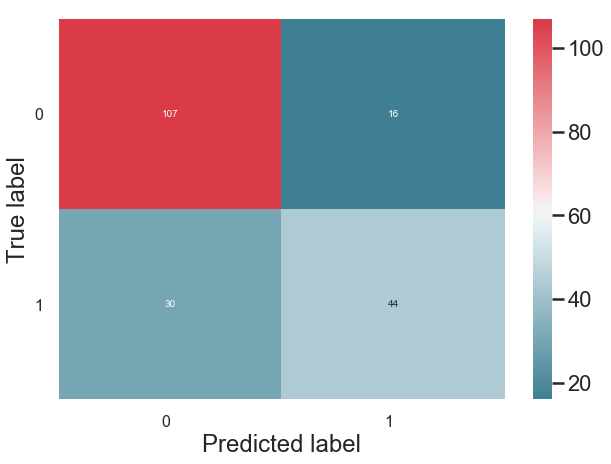

In [18]:
#Plot the confusion matrix for easier viewing
cm = metrics.confusion_matrix(y_test, y_pred)

labels=[0,1]

df_cm = pd.DataFrame(cm, index=labels, columns=labels)

fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", cmap=cmap)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 2. Logistic Regression

#### Scaling the Dataset

In [19]:
#Instantiate the MinMax Scaler
minmax = MinMaxScaler()

#Fit the scaler to the training set
#building the model.
# we use train set only so that when the model is applied to test, it hasn't seen the data. 
#we do not want to inform the test set. the test set should not be seen by the machine..
minmax.fit(x_train)


#Transform the training set
x_train_scaled = minmax.transform(x_train)

#Transform the test set
x_test_scaled = minmax.transform(x_test)

In [20]:
#View the type of the scaled data
type(x_train_scaled)

numpy.ndarray

In [21]:
#Change to Pandas dataframe for easier viewing and manipulation of the data
#sdf = scaled dataframe
x_train_sdf = pd.DataFrame(x_train_scaled, index=x_train.index, columns=x_train.columns)
x_test_sdf = pd.DataFrame(x_test_scaled, index=x_test.index, columns=x_test.columns)

In [22]:
#Check the min, max, and mean values to determine if features are on the same scale
x_train_sdf.describe()

,Pclass,Embarked,Title,AgeGroup,FareBand
count,694.000000,694.000000,694.000000,694.000000,694.000000
mean,0.649135,0.176513,0.153026,0.608790,0.501441
std,0.418398,0.315833,0.222632,0.227684,0.370788
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.000000,0.500000,0.333333
50%,1.000000,0.000000,0.000000,0.666667,0.333333
75%,1.000000,0.500000,0.200000,0.833333,0.916667
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
#View the dataset
x_train_sdf.head()

,Pclass,Embarked,Title,AgeGroup,FareBand
479,1.0,0.0,0.2,0.000000,0.333333
248,0.0,0.0,0.0,0.833333,1.000000
504,0.0,0.0,0.2,0.333333,1.000000
1,0.0,0.5,0.4,0.833333,1.000000
885,1.0,1.0,0.4,0.833333,0.666667


In [24]:
#Build Model using default parameters
logreg = LogisticRegression(C=1e9, class_weight="balanced", solver='liblinear', random_state=20)
logreg.fit(x_train_sdf, y_train)

LogisticRegression(C=1000000000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=20,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [25]:
#Make Predictions
y_pred = logreg.predict(x_test_sdf)

In [26]:
#Print Accuracy Score on Test Set
print("{:.2%}".format(metrics.accuracy_score(y_test,y_pred)))

75.63%


In [27]:
#Print Accuracy Score on a 5-fold cross-validation
score = np.mean(cross_val_score(logreg, predictors_filtered, target, cv=5))
print("{:.2%}".format(score))

77.23%


In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       123
           1       0.67      0.70      0.68        74

   micro avg       0.76      0.76      0.76       197
   macro avg       0.74      0.75      0.74       197
weighted avg       0.76      0.76      0.76       197



In [29]:
#Get the Confusion Matrix and other metrics to test performance
print("Classification report for classifier %s:\n%s\n"
      % (logreg, classification_report(y_test, y_pred)))

Classification report for classifier LogisticRegression(C=1000000000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=20,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       123
           1       0.67      0.70      0.68        74

   micro avg       0.76      0.76      0.76       197
   macro avg       0.74      0.75      0.74       197
weighted avg       0.76      0.76      0.76       197




In [30]:
#Encode Confusion Matrix into a DataFrame
labels = list(y_test.unique())
cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,index=labels, columns=labels)
cm_df

,1,0
1,97,26
0,22,52


Text(0.5,23.5,'Predicted label')

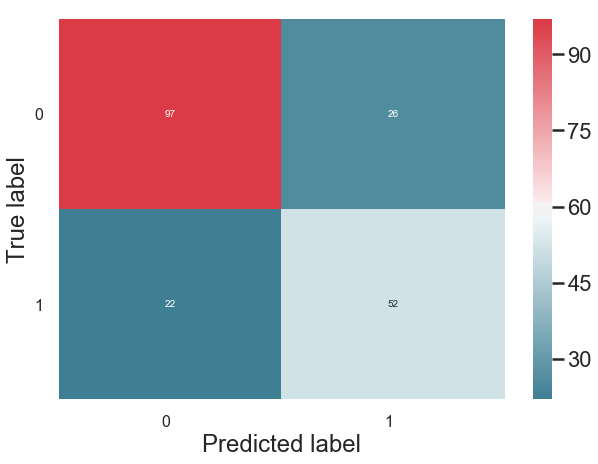

In [31]:
#Plot the confusion matrix for easier viewing
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", cmap=cmap)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 3. Gaussian Naive Bayes

### Scaling the Dataset

In [32]:
#Instantiate the Standard Scaler

scaler = StandardScaler()

#Fit the scaler to the training set
scaler.fit(x_train)

#Transform the training set
x_train_scaled = scaler.transform(x_train)

#Transform the test set
x_test_scaled = scaler.transform(x_test)

In [33]:
#Change to Pandas dataframe for easier viewing and manipulation of the data
x_train_sdf = pd.DataFrame(x_train_scaled, index=x_train.index, columns=x_train.columns)
x_test_sdf = pd.DataFrame(x_test_scaled, index=x_test.index, columns=x_test.columns)

In [34]:
#Build Model using default parameters
gnb = GaussianNB()
gnb.fit(x_train_scaled,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
#Make Predictions
gnb.predict(x_test_scaled)

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [36]:
#Print Accuracy Score on Test Set
print("{:.2%}".format(metrics.accuracy_score(y_test,y_pred)))

75.63%


In [37]:
#Print Accuracy Score on a 5-fold cross-validation
score = np.mean(cross_val_score(gnb, predictors_filtered, target, cv=5))
print("{:.2%}".format(score))

71.40%


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       123
           1       0.67      0.70      0.68        74

   micro avg       0.76      0.76      0.76       197
   macro avg       0.74      0.75      0.74       197
weighted avg       0.76      0.76      0.76       197



In [39]:
#Encode Confusion Matrix into a DataFrame
labels = list(y_test.unique())
cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,index=labels, columns=labels)
cm_df

,1,0
1,97,26
0,22,52


Text(0.5,23.5,'Predicted label')

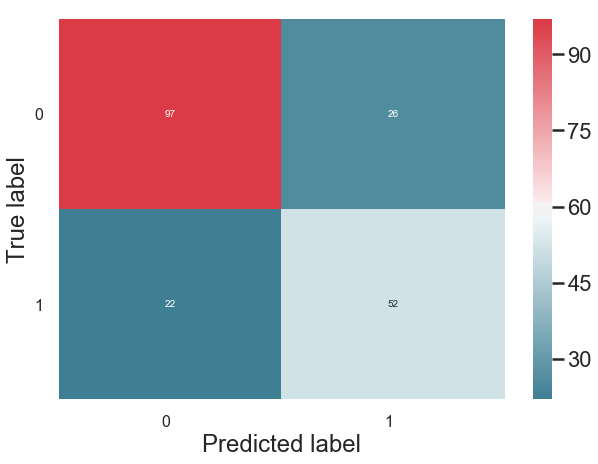

In [40]:
#Plot the confusion matrix for easier viewing
cm = metrics.confusion_matrix(y_test, y_pred)

labels=[0,1]

df_cm = pd.DataFrame(cm, index=labels, columns=labels)

fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", cmap=cmap)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

### 4. Decision Tree

In [41]:
#Build Model using default parameters

#Instantiate the Algorithm
clf = tree.DecisionTreeClassifier(criterion="gini", min_samples_split=4, min_samples_leaf=5,
            max_depth=10, random_state=20)

#Train the model
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=20,
            splitter='best')

In [42]:
#Make Predictions
clf.predict(x_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0],
      dtype=int64)

In [43]:
#Print Accuracy Score on Test Set
print("{:.2%}".format(metrics.accuracy_score(y_test,y_pred)))

75.63%


In [44]:
#Print Accuracy Score on a 5-fold cross-validation
score = np.mean(cross_val_score(clf, predictors_filtered, target, cv=5))
print("{:.2%}".format(score))

80.25%


In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       123
           1       0.67      0.70      0.68        74

   micro avg       0.76      0.76      0.76       197
   macro avg       0.74      0.75      0.74       197
weighted avg       0.76      0.76      0.76       197



In [46]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, y_pred)))

Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=20,
            splitter='best'):
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       123
           1       0.67      0.70      0.68        74

   micro avg       0.76      0.76      0.76       197
   macro avg       0.74      0.75      0.74       197
weighted avg       0.76      0.76      0.76       197




In [47]:
#Encode Confusion Matrix into a DataFrame
labels = list(y_test.unique())
cm = metrics.confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,index=labels, columns=labels)
cm_df

,1,0
1,97,26
0,22,52


Text(0.5,23.5,'Predicted label')

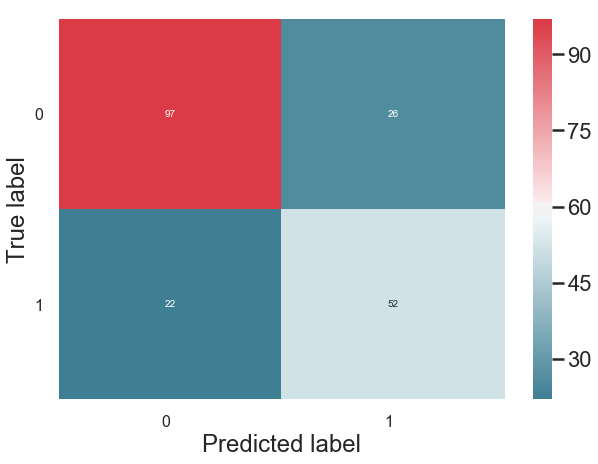

In [48]:
#Plot the confusion matrix for easier viewing
cm = metrics.confusion_matrix(y_test, y_pred)

labels=[0,1]

df_cm = pd.DataFrame(cm, index=labels, columns=labels)

fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", cmap=cmap)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')